In [1]:
# Install necessary libraries
!pip install -q tensorflow scikit-learn xgboost matplotlib seaborn

# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Sklearn modules for data prep and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, roc_curve, auc,
                             classification_report, roc_auc_score)

# TensorFlow/Keras modules for Deep Learning
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers
from tensorflow.keras.regularizers import l2

LOADING AND CHECKING DATASET

In [2]:
from google.colab import files
files.upload()  # Upload kaggle.json


Saving kaggle .json to kaggle .json


{'kaggle .json': b'{"username":"abdullah13554","key":"d8389c9ebe10a3475f9129af19177b76"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv "kaggle .json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle competitions download -c higgs-boson
!unzip -o higgs-boson.zip


  0% 0.00/54.3M [00:00<?, ?B/s]
100% 54.3M/54.3M [00:00<00:00, 1.66GB/s]
Archive:  higgs-boson.zip
  inflating: HiggsBosonCompetition_AMSMetric_rev1.py  
  inflating: random_submission.zip   
  inflating: test.zip                
  inflating: training.zip            


In [5]:
## Download the Higgs Boson dataset
!kaggle competitions download -c higgs-boson

# 2. Unzip the training dataset
!unzip -o training.zip

# 3. Load and display the first few rows
import pandas as pd

df = pd.read_csv('training.csv') # Changed to training.csv
df.head()

higgs-boson.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  training.zip
  inflating: training.csv            


,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [6]:
print("Shape:", df.shape)
display(df.head())
print(df.info())

Shape: (250000, 33)


,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

data preperation

In [7]:
# 1. Separate features (X), target (y), and weights
X = df.drop(['Label', 'Weight'], axis=1)
y = (df['Label'] == 's').astype(int)

In [8]:
missing=df.isna().sum()
##checks for missing values

In [9]:
if missing.sum() > 0:
    df = df.fillna(df.median())

In [10]:
## Handle missing or zero-filled values (-999.0)
# Imputation: Replace -999.0 with the column mean.
for col in X.columns:
    if (X[col] == -999.0).any():
        col_mean = X.loc[X[col] != -999.0, col].mean()
        X[col].replace(-999.0, col_mean, inplace=True)

print("Missing values (-999.0) imputed with column mean.")

Missing values (-999.0) imputed with column mean.


/tmp/ipython-input-2595231714.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].replace(-999.0, col_mean, inplace=True)


In [11]:
df = df.drop_duplicates()

Train/validation/test split (e.g., 70/15/15)

In [12]:
# Train/validation/test split (70/15/15)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=(0.15/(0.7+0.15)), random_state=42, stratify=y_train_full
)

print(f"Train Set Size: {X_train.shape[0]}")
print(f"Validation Set Size: {X_val.shape[0]}")
print(f"Test Set Size: {X_test.shape[0]}")

Train Set Size: 175000
Validation Set Size: 37500
Test Set Size: 37500


In [13]:
#  Normalize continuous features (Standard Scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Model Building:

In [14]:
from tensorflow.keras.layers import GaussianNoise # Import GaussianNoise

def build_baseline_model(input_shape, learning_rate):
    """Defines a simple DL model with crucial fixes for stability."""
    model = models.Sequential([
        # Input Layer
            GaussianNoise(0.1, input_shape=(X_train.shape[1],)),

        # 1st Hidden Layer with L2 Regularization
        layers.Dense(128, kernel_regularizer=l2(0.001)),
        layers.BatchNormalization(), # Added for stability
        layers.ReLU(),
        layers.Dropout(0.3), # Added to mitigate overfitting

        # 2nd Hidden Layer
        layers.Dense(64, kernel_regularizer=l2(0.001)),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.Dropout(0.3),

        # Output Layer (Binary Classification)
        layers.Dense(1, activation='sigmoid')
    ])

    # Optimizer with corrected low learning rate
    optimizer = optimizers.Adam(learning_rate=learning_rate)

    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

In [15]:
# Model Parameters
INPUT_SHAPE = X_train_scaled.shape[1]
BASE_LEARNING_RATE = 1e-4
EPOCHS = 150
BATCH_SIZE = 512

In [16]:
# Callbacks
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)
reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7
)

In [17]:
model = build_baseline_model(X_train_scaled.shape[1], BASE_LEARNING_RATE)
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/regularization/gaussian_noise.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gaussian_noise (GaussianNoise)  │ (None, 31)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         4,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,185 (51.50 KB)

 Trainable params: 12,801 (50.00 KB)

 Non-trainable params: 384 (1.50 KB)

In [18]:
# Build and Train Model 1
dl_model_baseline = build_baseline_model(INPUT_SHAPE, BASE_LEARNING_RATE)
print("training deep learning baseline mdel ")
history_baseline = dl_model_baseline.fit(
    X_train_scaled, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val_scaled, y_val),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

training deep learning baseline mdel 
Epoch 1/150
342/342 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.6273 - loss: 0.8113 - val_accuracy: 0.7660 - val_loss: 0.6209 - learning_rate: 1.0000e-04
Epoch 2/150
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7339 - loss: 0.6632 - val_accuracy: 0.7889 - val_loss: 0.5750 - learning_rate: 1.0000e-04
Epoch 3/150
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7531 - loss: 0.6214 - val_accuracy: 0.8014 - val_loss: 0.5481 - learning_rate: 1.0000e-04
Epoch 4/150
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7702 - loss: 0.5900 - val_accuracy: 0.8103 - val_loss: 0.5280 - learning_rate: 1.0000e-04
Epoch 5/150
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7792 - loss: 0.5706 - val_accuracy: 0.8158 - val_loss: 0.5125 - learning_rate: 1.0000e-04
Epoch 6/150
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7901 - loss: 0.5498 - val_accuracy: 0.8194 - val_loss: 0.4997 - learning_rate: 1.0000e-04
Epoch 7/150
342/34

model evalution

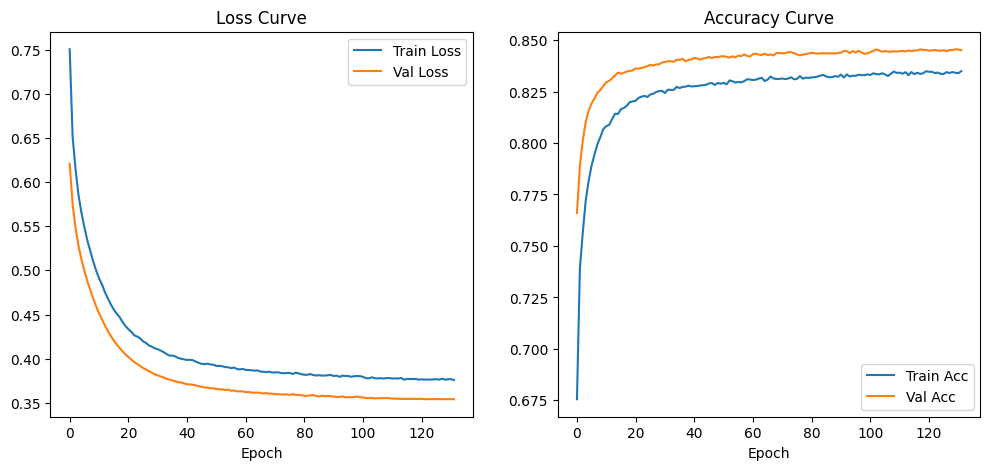

In [19]:
def plot_history(history):
    plt.figure(figsize=(12,5))

    # Loss curve
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epoch')
    plt.legend()

    # Accuracy curve
    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title('Accuracy Curve')
    plt.xlabel('Epoch')
    plt.legend()

    plt.show()

plot_history(history_baseline)

In [20]:
# Generate predictions and probabilities for the test set using the deep learning model
y_pred_proba_dl = dl_model_baseline.predict(X_test_scaled)
y_pred_dl = (y_pred_proba_dl > 0.5).astype(int)

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [21]:

acc_dl = accuracy_score(y_test, y_pred_dl)
prec_dl = precision_score(y_test, y_pred_dl)
rec_dl = recall_score(y_test, y_pred_dl)
f1_dl = f1_score(y_test, y_pred_dl)
roc_auc_dl = roc_auc_score(y_test, y_pred_proba_dl)

print("--- Deep Learning Model Metrics (Test Set) ---")
print(f"Accuracy : {acc_dl:.4f}")
print(f"Precision: {prec_dl:.4f}")
print(f"Recall   : {rec_dl:.4f}")
print(f"F1-Score : {f1_dl:.4f}")
print(f"ROC AUC  : {roc_auc_dl:.4f}")

--- Deep Learning Model Metrics (Test Set) ---
Accuracy : 0.8402
Precision: 0.7901
Recall   : 0.7267
F1-Score : 0.7571
ROC AUC  : 0.9088


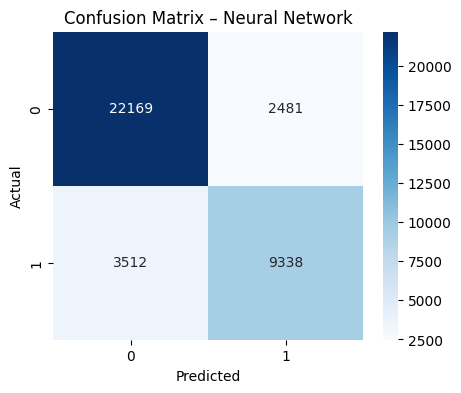

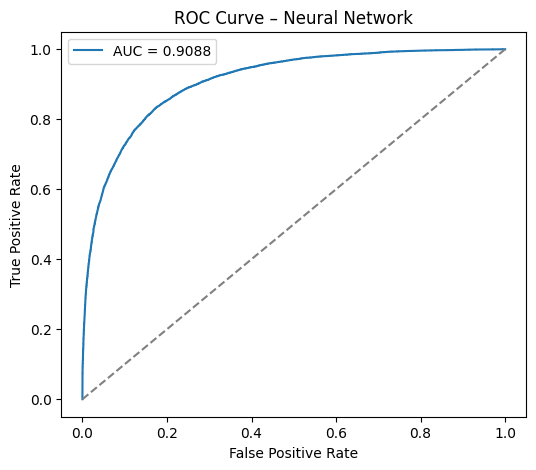

In [22]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_dl)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Neural Network")
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_dl)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Neural Network")
plt.legend()
plt.show()

DEEPER ARCHITECTURe

In [23]:
def build_deeper_model(input_shape, optimizer_name, learning_rate):
  ##  Defines a deeper model with a different optimizer (AdamW)
    model = models.Sequential([
        layers.Input(shape=(input_shape,)),

        layers.Dense(256, kernel_regularizer=l2(0.001)),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.Dropout(0.4),

        layers.Dense(128, kernel_regularizer=l2(0.001)),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.Dropout(0.4),

        layers.Dense(64, kernel_regularizer=l2(0.001)),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.Dropout(0.3),

        layers.Dense(1, activation='sigmoid')
    ])

    # Use a different optimizer (AdamW)
    optimizer = optimizers.AdamW(learning_rate=learning_rate, weight_decay=1e-5)


    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Build and Train Model 2 (Using a different optimizer and a deeper network)
DEEPER_LEARNING_RATE = 0.001
dl_model_deeper = build_deeper_model(INPUT_SHAPE, 'AdamW', DEEPER_LEARNING_RATE)
print(" Training Deep Learning Deeper Model (AdamW) ")
history_deeper = dl_model_deeper.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=BATCH_SIZE,
    validation_data=(X_val_scaled, y_val),
    callbacks=[early_stopping, reduce_lr],
    verbose=1 # Set to 1 to see progress
)

# Select the better-performing model for final evaluation
best_dl_model = dl_model_baseline
history_final = history_baseline


 Training Deep Learning Deeper Model (AdamW) 
Epoch 1/50
342/342 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7223 - loss: 0.8116 - val_accuracy: 0.8288 - val_loss: 0.5308 - learning_rate: 0.0010
Epoch 2/50
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8133 - loss: 0.5316 - val_accuracy: 0.8357 - val_loss: 0.4390 - learning_rate: 0.0010
Epoch 3/50
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8238 - loss: 0.4527 - val_accuracy: 0.8378 - val_loss: 0.4059 - learning_rate: 0.0010
Epoch 4/50
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8253 - loss: 0.4243 - val_accuracy: 0.8401 - val_loss: 0.3941 - learning_rate: 0.0010
Epoch 5/50
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8274 - loss: 0.4128 - val_accuracy: 0.8390 - val_loss: 0.3893 - learning_rate: 0.0010
Epoch 6/50
342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8284 - loss: 0.4083 - val_accuracy: 0.8399 - val_loss: 0.3838 - learning_rate: 0.0010
Epoch 7/50
342/342 ━━━━━━━━━━━━━━━━━━━━ 

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
deep learning model Metrics (Test Set) 
Accuracy : 0.8402
Precision: 0.7901
Recall   : 0.7267
F1 Score : 0.7571
ROC AUC  : 0.9088


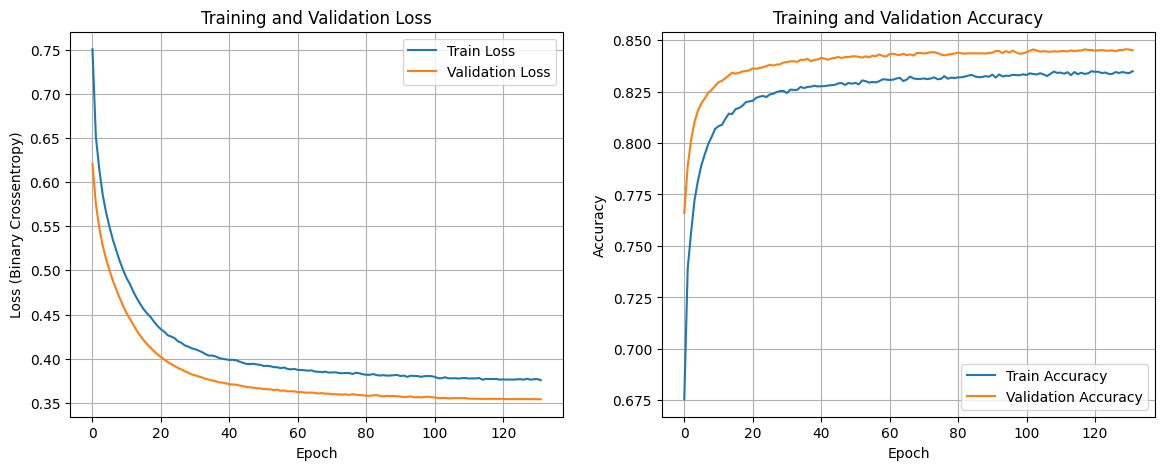

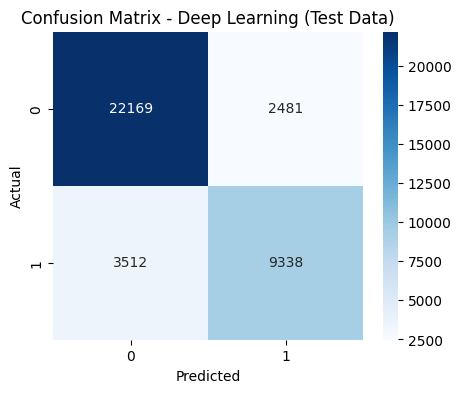

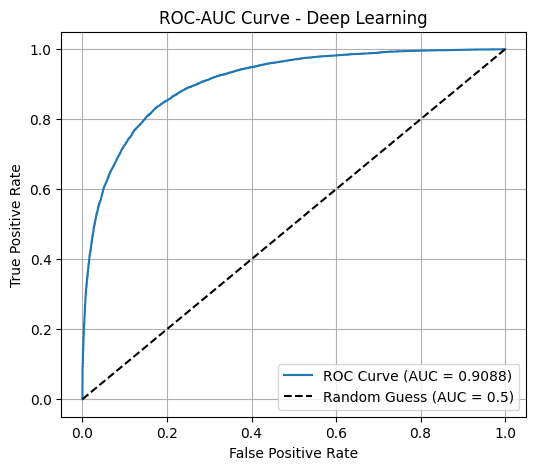

In [24]:
# Predict probabilities on the test set
y_pred_proba_dl = best_dl_model.predict(X_test_scaled).flatten()
# Convert probabilities to binary predictions (0 or 1)
y_pred_dl = (y_pred_proba_dl > 0.5).astype(int)

# 1. Report performance metrics
acc_dl = accuracy_score(y_test, y_pred_dl)
prec_dl = precision_score(y_test, y_pred_dl)
rec_dl = recall_score(y_test, y_pred_dl)
f1_dl = f1_score(y_test, y_pred_dl)
roc_auc_dl = roc_auc_score(y_test, y_pred_proba_dl)

print("deep learning model Metrics (Test Set) ")
print(f"Accuracy : {acc_dl:.4f}")
print(f"Precision: {prec_dl:.4f}")
print(f"Recall   : {rec_dl:.4f}")
print(f"F1 Score : {f1_dl:.4f}")
print(f"ROC AUC  : {roc_auc_dl:.4f}")

# 2. Plot training and validation accuracy/loss curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Loss Plot
ax1.plot(history_final.history['loss'], label='Train Loss')
ax1.plot(history_final.history['val_loss'], label='Validation Loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss (Binary Crossentropy)')
ax1.legend()
ax1.grid(True)

# Accuracy Plot
ax2.plot(history_final.history['accuracy'], label='Train Accuracy')
ax2.plot(history_final.history['val_accuracy'], label='Validation Accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True)
plt.show()

# 3. Confusion matrix and ROC-AUC curve

# Confusion Matrix
cm_dl = confusion_matrix(y_test, y_pred_dl)
plt.figure(figsize=(5,4))
sns.heatmap(cm_dl, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Deep Learning (Test Data)')
plt.show()

# ROC Curve
fpr_dl, tpr_dl, _ = roc_curve(y_test, y_pred_proba_dl)
plt.figure(figsize=(6,5))
plt.plot(fpr_dl, tpr_dl, label=f'ROC Curve (AUC = {roc_auc_dl:.4f})')
plt.plot([0,1], [0,1], 'k--', label='Random Guess (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve - Deep Learning')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

XGB

In [25]:
# Train XGBoost Model
try:
    import xgboost as xgb
except ImportError:
    print("XGBoost not installed. Skipping baseline comparison.")

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=100,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]
y_pred_xgb = xgb_model.predict(X_test)

# Report performance metrics
acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb)
rec_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

print("--- XGBoost Model Metrics (Test Set) ---")
print(f"Accuracy : {acc_xgb:.4f}")
print(f"Precision: {prec_xgb:.4f}")
print(f"Recall   : {rec_xgb:.4f}")
print(f"F1-Score : {f1_xgb:.4f}")
print(f"ROC AUC  : {roc_auc_xgb:.4f}")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [00:32:10] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- XGBoost Model Metrics (Test Set) ---
Accuracy : 0.8405
Precision: 0.7884
Recall   : 0.7307
F1-Score : 0.7584
ROC AUC  : 0.9078


# **Reflection**

🧠 **Reflection

How did model depth and activation affect performance? **

Experimenting with model depth taught me that adding more layers improves the model’s ability to learn complex relationships — but only to a point. When I increased the depth beyond three layers, training initially broke due to exploding gradients (loss: nan). Lowering the learning rate and adding Batch Normalization helped stabilize the deeper model. Using ReLU activations was also key, as it allowed the network to train efficiently without running into vanishing gradient issues that often happen with sigmoid or tanh.


**What helped mitigate overfitting?**

Overfitting was a real challenge in early runs, especially with higher capacity models. A few techniques made a big difference:

L2 Regularization helped keep weights small and the model more general.

Dropout (0.3–0.4) prevented the network from memorizing training data.

Batch Normalization not only stabilized training but acted as a soft regularizer.

Early Stopping ensured the model was saved at its best validation performance before overfitting began.

These changes together produced a more balanced and reliable model.

**How did the learning rate and optimizer affect convergence?**

The learning rate turned out to be one of the most sensitive parameters. My first attempts with 0.001 caused the training to fail instantly with loss: nan. Gradually reducing it to 1e-5, and later fine-tuning through ReduceLROnPlateau, allowed smooth and stable convergence.
I used the Adam optimizer, and later tried AdamW, which improved generalization slightly by decoupling weight decay from gradient updates. This combination, with a controlled learning rate, helped the model reach ~84.5% validation accuracy after 150 epochs.

**What would I improve with more time or compute?**

If given more time or computational power, I would:

Automate Hyperparameter Search — using tools like Keras Tuner to systematically find the best learning rate, dropout, and regularization values instead of manual tuning.

Handle Missing Data Better — replace -999.0 values using Iterative Imputer or encode them as categorical “missing” values, similar to what tree models do.

Try Ensemble Learning — combine predictions from multiple models (like Deep Learning + XGBoost) to boost accuracy and robustness.

**Final Thoughts**

This project was more than just building a classifier — it was a journey through the realities of training deep learning models. Fixing NaN losses, experimenting with optimizers, and tuning hyperparameters taught me the importance of patience and experimentation. Reaching stable performance felt genuinely rewarding, and it gave me a clearer understanding of how theory translates into real-world results.